> **5장 정리**
- 산점도 scatter plot : 2개의 feature간의 관계 파악
- 히스토그램 barplot : 수치형 특성의 값을 일정한 구간으로 나누어 구간 안에 포함된 데이터 개수를 막대 그래프로 그린 것
- 상자수염그림 boxplot : 최솟값, 3개의 4분위수, 최댓값 5개의 숫자를 이용해 데이터를 요약하는 그래프 -> 이상치 데이터는 점으로 표현 => 데이터가 어떤 방향으로 더 많이 늘어져 있는지 파악하기 좋음

---
- 선 그래프 : 데이터 포인트 사이를 선으로 이은 그래프
- 선 그래프, 막대 그래프는 전체 데이터의 형태를 가늠할 수 있는 산점도와는 다름 => 한 column을 기준으로 데이터의 변화가 어떻게 되는가를 살피는 데 용이

### pyplot 방식과 객체 지향 api 방식

- 그래프를 그리는 2가지 방식
1. matplotlib.pyplot의 pyplot 방식
2. 피겨 객체와 서브플롯 객체를 명시적으로 만들고, 이 객체의 메서드를 사용하는 객체 지향 API 방식


In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

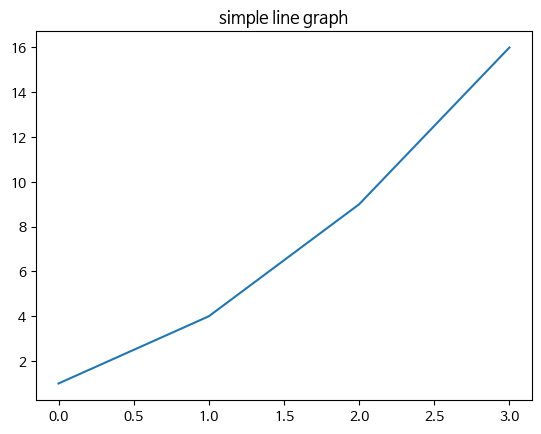

In [36]:
# matplotlib.pyplot에 있는 함수를 사용하면 함수들이 하나의 피겨 객체에 대한 상태를 공유
# 즉, plot()과 title()은 동일한 피겨 객체에 적용된다는 것
plt.plot([1, 4, 9, 16])
plt.title('simple line graph')
plt.show()

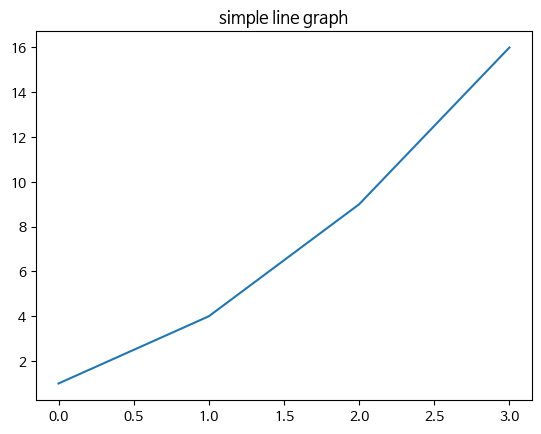

In [37]:
# axes 객체를 사용하는 객체 지향 api 방식
fig, ax = plt.subplots()
ax.plot([1, 4, 9, 16])
ax.set_title('simple line graph')
fig.show()

## 그래프에 한글을 표현하는 법

In [38]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [40]:
# 나눔고딕 폰트를 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'

In [41]:
# rc()
# 'font.family' : font가 그룹, family가 그룹의 하위속성
# rc(그룹, 그룹의 하위속성)
plt.rc('font', family='NanumBarunGothic')

> plt.rc()를 사용하면 한 번에 여러 설정을 동시에 지정 가능

In [42]:
plt.rc('font', family='NanumBarunGothic', size=11)

In [43]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumBarunGothic'] 11.0


In [44]:
# matplotlib은 시스템에 설치된 폰트를 자동으로 감지하여 사용한다.
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.

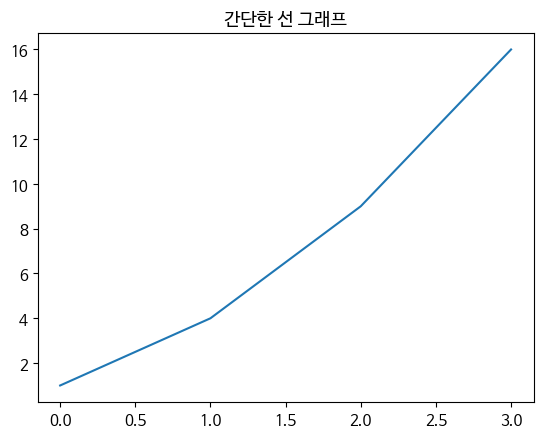

In [45]:
plt.plot([1, 4, 9, 16])
plt.title('간단한 선 그래프')
plt.show()

In [46]:
plt.rc('font', size = 10)

### 출판사별 발행 도서 개수 산점도 그리기

In [47]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()


Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 192MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [48]:
len(ns_book7['출판사'].unique())

21875

In [49]:
# 상위 30개만
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

출판사
문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: count, dtype: int64

In [50]:
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [51]:
top30_pubs_idx.sum()

51886

In [52]:
# 위의 책들 중 1000개의 책만 random 추출
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


## 산점도 그리기

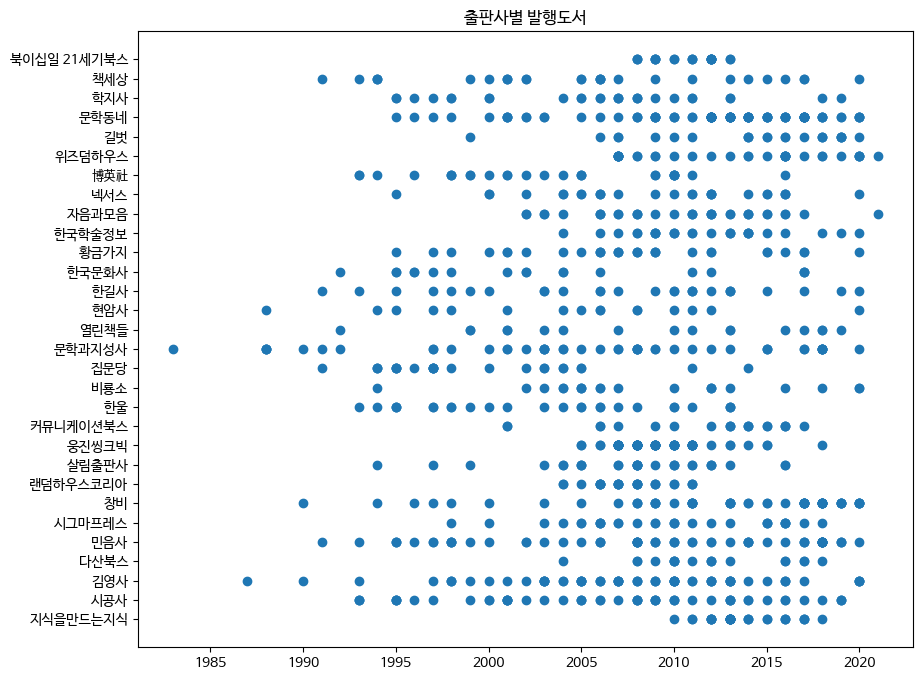

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'])
ax.set_title('출판사별 발행도서')
fig.show()

In [55]:
# marker의 기본값
plt.rcParams['lines.markersize']

6.0

### 어떤 년도에 얼마나 많은 도서가 대출되었는지는 알 수 없음 => 값에 따라 마커 크기를 다르게 나타내기

- 대출건수 열을 마커 크기로 전달하여 대출건수가 많은 도서를 상대적으로 크게 그릴 수 있음

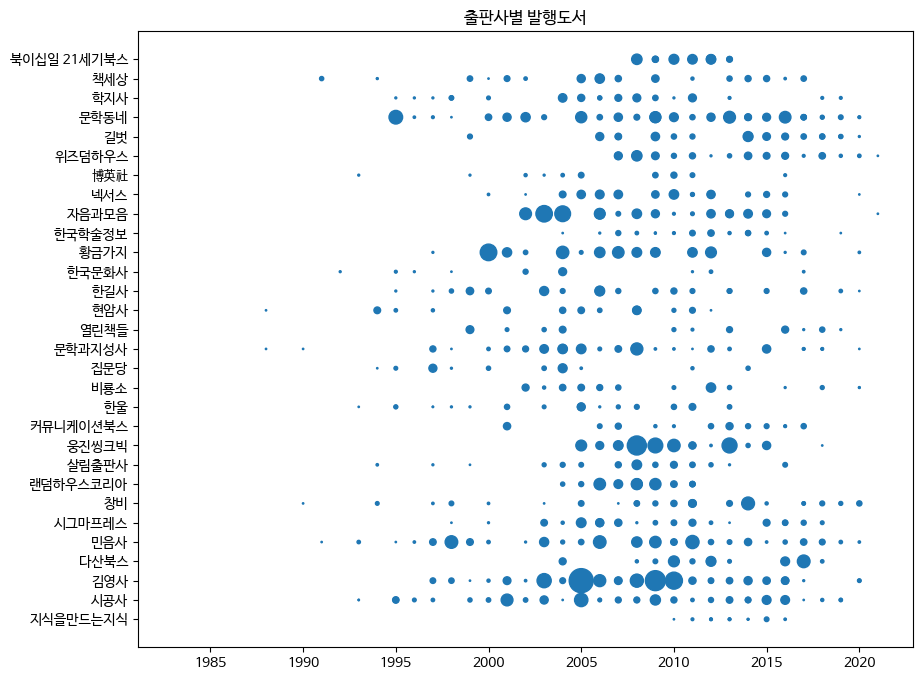

In [57]:
# 입력 데이터와 동일한 길이의 배열을 전달하면 배열에 있는 값에 따라 마커 크기가 바뀐다.
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

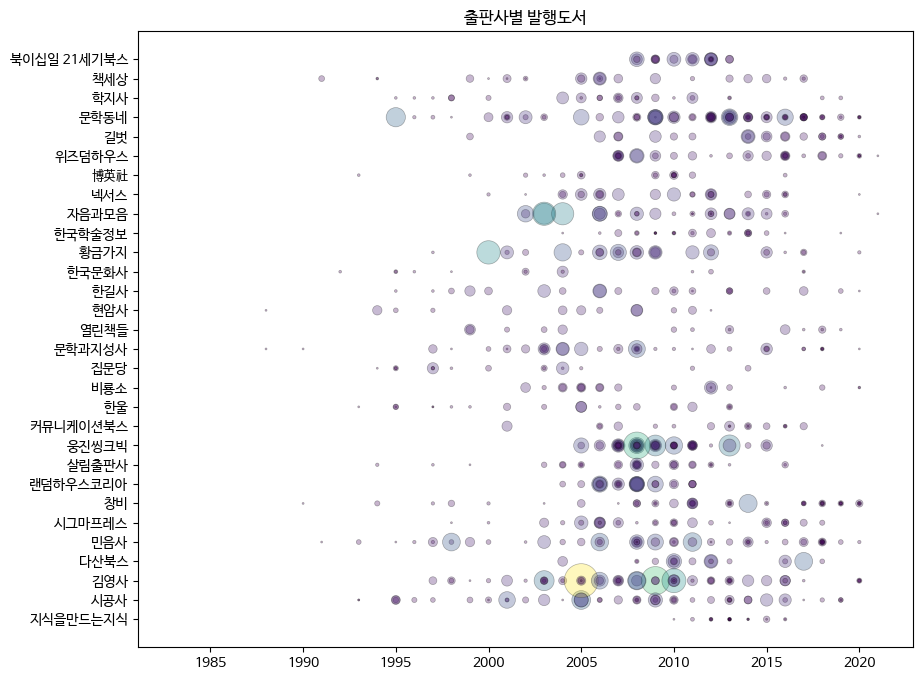

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'],linewidths=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수']*2, c=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

=> 황금 가지 출판사에서 발행한 도서 중 2000년에 발행한 도서는 높은 대출건수를 가지고 있지만, 2005년 이후 발행한 도서의 양이 더 많다.

## 값에 따라 색상 표현하기 : 컬러맵

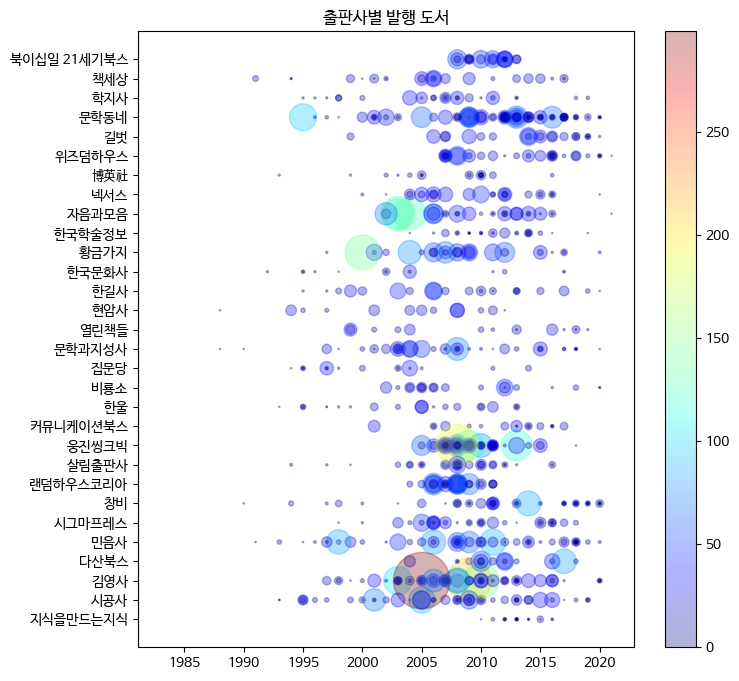

In [62]:
# jet 컬러맵을 자주 사용
# 낮은 값일 수록 짙은 파란색, 높은 값일수록 붉은색, 가운데는 노란색
fig, ax = plt.subplots(figsize = (8,8))
sc = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s = ns_book8['대출건수']**1.3, c = ns_book8['대출건수'], cmap = 'jet', alpha = 0.3)
ax.set_title('출판사별 발행 도서')
fig.colorbar(sc)
fig.show()

- 마커 크기를 이용하여 데이터를 교묘하게 왜곡시킬 수 있기에, 마커 크기를 이용해서 데이터를 표현한다면 어떤 방식으로 그렸는지 알리는 것이 좋다.

- s 매개변수 : 마커의 크기 => dataframe의 하나의 칼럼으로 값을 지정 가능
- c 매개변수 : 산점도의 색 지정 => c 매개변수에 s매개변수처럼 데이터 개수와 동일한 길이의 배열 전달 시, 각 데이터 별로 다른 색으로 그릴 수 있음